In [44]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# from sklearn.linear_model import LinearRegression

In [21]:
# !pip install scipy
from scipy.stats import linregress

In [6]:
dogdf = pd.read_csv("dog_rates_tweets.csv", parse_dates=['created_at'])

In [7]:
dogdf

,id,created_at,text
0,994677639364403200,2018-05-10 20:36:44,@Steff88979267 tell them to h*ck off
1,994364904978239488,2018-05-09 23:54:02,@NFLOwnerGBP take it back
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...
3,994336722875047936,2018-05-09 22:02:03,@rachaellanaghan ❤️
4,994024065982717952,2018-05-09 01:19:40,This is Captain Jack Wobbles. He is currently ...
...,...,...,...
11710,1091789851282665472,2019-02-02 20:05:59,This is Cadogan. He’s had the same morning rou...
11711,1091772144927666176,2019-02-02 18:55:38,@mayapolarbear 6/5 stars
11712,1091425960606367745,2019-02-01 20:00:01,@Acallofthevoid 🤗
11713,1091417463512678400,2019-02-01 19:26:15,@jaytay777 OLIVER!!! you’re doing so well budd...


In [8]:
def extract_dog_rates(text):
    matched_values = re.search(r'(\d+(\.\d+)?)/10',text)
    if matched_values:
        return float(matched_values.group(1))
    return None

In [9]:
dogdf['rating'] = dogdf['text'].apply(extract_dog_rates)

In [10]:
dogdf = dogdf[dogdf['rating'].notnull()]

In [11]:
dogdf = dogdf[dogdf['rating'] <= 25]

In [12]:
dogdf['TimeStamp'] = dogdf['created_at'].apply(lambda x: x.timestamp())

In [25]:
x = dogdf['TimeStamp']
y = dogdf['rating']

In [39]:
result = linregress(x,y)
best_line = result.slope * x + result.intercept
p_value = result.pvalue
# residuals
best_line

2        12.624973
7        12.622373
8        12.620951
24       12.613109
30       12.610619
           ...    
11631    13.183014
11638    13.180420
11665    13.168949
11666    13.168949
11672    13.167190
Name: TimeStamp, Length: 1871, dtype: float64

In [40]:
y

2        14.0
7        13.0
8        14.0
24       13.0
30       13.0
         ... 
11631    15.0
11638    14.0
11665    13.0
11666    13.0
11672    12.0
Name: rating, Length: 1871, dtype: float64

In [43]:
residuals = y - best_line
residuals


2        1.375027
7        0.377627
8        1.379049
24       0.386891
30       0.389381
           ...   
11631    1.816986
11638    0.819580
11665   -0.168949
11666   -0.168949
11672   -1.167190
Length: 1871, dtype: float64

In [42]:
if (p_value > 0.05):
    print("We cannot reject the null hypothesis. The slope is not different from zero")
else:
    print("We reject the null hyopthesis. The slope is different from zero")

We reject the null hyopthesis. The slope is different from zero


(array([  1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,
          2.,   0.,   4.,   1.,   1.,   1.,   1.,   0.,   4.,   3.,   3.,
          7.,   3.,   4.,  18.,   2.,   3.,  41.,  28.,  50., 175.,  75.,
        163., 245., 147., 231., 273., 149., 107.,  76.,  25.,  16.,   3.,
          2.,   0.,   1.,   0.,   0.,   1.]),
 array([-11.75256231, -11.41765623, -11.08275014, -10.74784405,
        -10.41293797, -10.07803188,  -9.7431258 ,  -9.40821971,
         -9.07331362,  -8.73840754,  -8.40350145,  -8.06859537,
         -7.73368928,  -7.3987832 ,  -7.06387711,  -6.72897102,
         -6.39406494,  -6.05915885,  -5.72425277,  -5.38934668,
         -5.05444059,  -4.71953451,  -4.38462842,  -4.04972234,
         -3.71481625,  -3.37991016,  -3.04500408,  -2.71009799,
         -2.37519191,  -2.04028582,  -1.70537974,  -1.37047365,
         -1.03556756,  -0.70066148,  -0.36575539,  -0.03084931,
          0.30405678,   0.63896287,   0.97386895,   1.30877504,
          1.643681

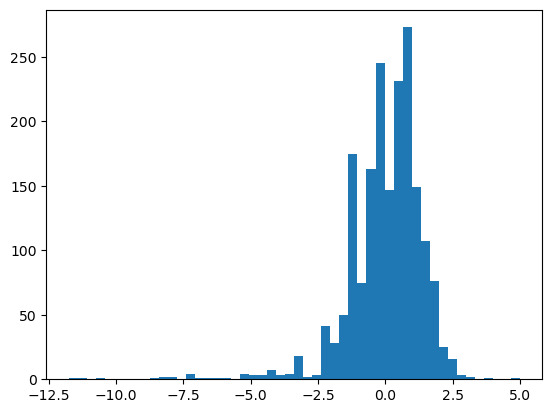

In [49]:
plt.hist(residuals, bins=50)

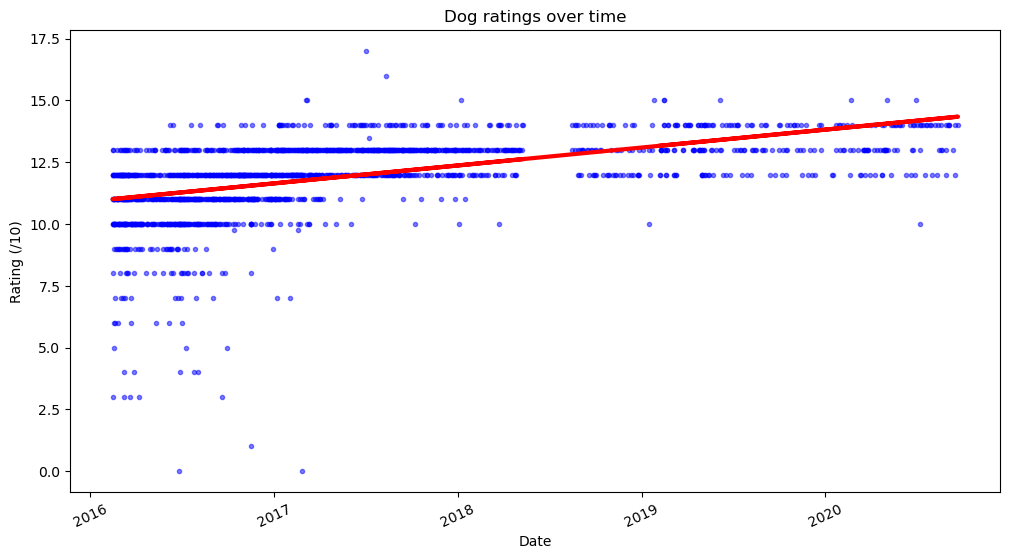

In [15]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=25)
plt.plot(dogdf['created_at'], dogdf['rating'], 'b.', label='Ratings', alpha=0.5)
plt.plot(dogdf['created_at'], best_line, 'r-', label='Best-Fit line', linewidth=3)
plt.title('Dog ratings over time')
plt.xlabel('Date')
plt.ylabel('Rating (/10)')
plt.show()